In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import os
mainpath = "C:/Users/Jorge/PDE_DSML_Notebooks/data/"
filename = "iris.csv"
fullpath = os.path.join(mainpath, filename)
#CARGAR TUS BASES
data = pd.read_csv(fullpath)
data.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]
X=data[predictors]
Y=data[target]

In [5]:
# Separando en train y test
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,
                                           random_state=8)

In [6]:
from sklearn.tree import DecisionTreeClassifier

* min_samples_split: numero de elementos para el corte
* min_samples_leaf: numero de elementos en el nodo hoja

In [7]:
tree_f = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99,min_samples_leaf=5)
tree_f.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=20, random_state=99)

In [8]:
preds = tree_f.predict(Xtest)

In [9]:
pd.crosstab(ytest, preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,13,0,0
versicolor,0,11,1
virginica,0,4,9


In [10]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [11]:
pd.unique(Y).tolist()

['setosa', 'versicolor', 'virginica']

In [12]:
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import export_text

Profundidad del árbol: 3
Número de nodos terminales: 4


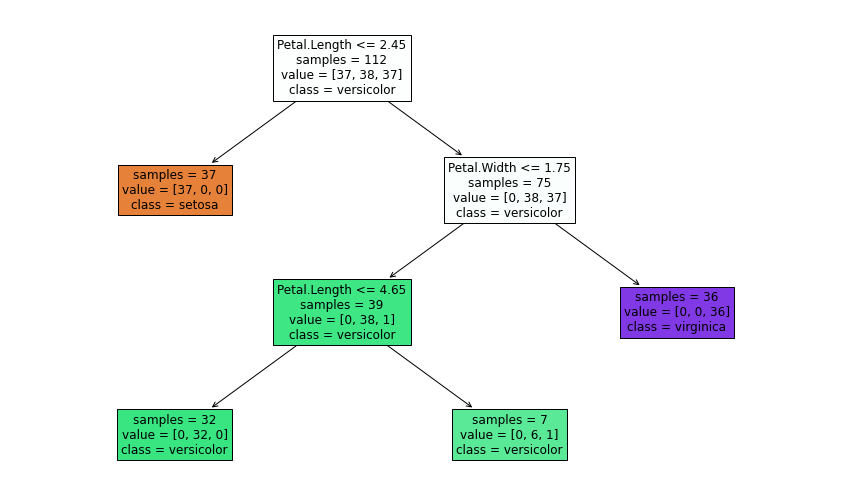

In [13]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(15, 9))

print(f"Profundidad del árbol: {tree_f.get_depth()}")
print(f"Número de nodos terminales: {tree_f.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree_f,
            feature_names = predictors,
            class_names   = pd.unique(Y).tolist(),
            filled        = True,
            impurity      = False,
            fontsize      = 12,
            ax            = ax
       )

In [14]:
text_representation = tree.export_text(tree_f)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.65
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.65
|   |   |   |--- class: versicolor
|   |--- feature_3 >  1.75
|   |   |--- class: virginica



# Cross Validation para la poda

In [15]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = 10, n_jobs=1)
scores

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

In [18]:
score = np.mean(scores)
score

0.96

In [19]:
# La profundidad máxima del árbol
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = 5
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    #print("   ",tree.feature_importances_)

Score para i =  1  es de  0.6666666666666666
Score para i =  2  es de  0.9333333333333332
Score para i =  3  es de  0.96
Score para i =  4  es de  0.96
Score para i =  5  es de  0.96
Score para i =  6  es de  0.96
Score para i =  7  es de  0.96
Score para i =  8  es de  0.96
Score para i =  9  es de  0.96
Score para i =  10  es de  0.96


In [20]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

# Random forest

In [21]:
# Random Forest Clasificación
#############################
from sklearn.ensemble import RandomForestClassifier # Librería
rf_cl=RandomForestClassifier(max_depth=15,n_estimators=10,random_state=4) # Objeto
rf_cl.fit(Xtrain,ytrain) # Entrenamiento

RandomForestClassifier(max_depth=15, n_estimators=10, random_state=4)

In [22]:
# Precisión
print(rf_cl.score(Xtrain,ytrain))
print(rf_cl.score(Xtest,ytest) )

0.9821428571428571
0.868421052631579


# XGBoost Clasificación

In [23]:
pip install xgboost

In [24]:
import xgboost as xgb

In [25]:
xgb_cl=xgb.XGBClassifier(objective='binary:logistic',max_depth=15,#objective='multi:softprob'
                         n_estimators=10,seed=4) # Objeto reg:linear
xgb_cl.fit(Xtrain,ytrain) # Entrenamiento

# Precisión
print(xgb_cl.score(Xtrain,ytrain))
print(xgb_cl.score(Xtest,ytest))

0.9910714285714286
0.868421052631579
